# Introduction
In the competition, it's required to the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

This is the getting started notebook. Things are kept simple so that it's easier to understand the steps and modify it.

### File descriptions
train.csv - the training set.


test.csv - the test set.

### Data fields
-ID - an ID for this instance

-Date - year-month-day

-Hour - Hour of he day

-Temperature - Temperature in Celsius

-Humidity - %

-Windspeed - m/s

-Visibility - 10m

-Dew point temperature - Celsius

-Solar radiation - MJ/m2

-Rainfall - mm

-Snowfall - cm

-Seasons - Winter, Spring, Summer, Autumn

-Holiday - Holiday/No holiday

-Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

-y - Rented Bike count (Target), Count of bikes rented at each hour

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Exploratory Data Analysis

In [2]:
dataset_path = '/kaggle/input/seoul-bike-rental-ai-pro-iti/'

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print("The shape of the dataset is {}.\n\n".format(df_train.shape))

df_train.head()

The shape of the dataset is (5760, 15).




,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
#df_train = pd.read_csv('train.csv',encoding='ISO-8859-1')
#df_test = pd.read_csv('test.csv',encoding='ISO-8859-1')

In [4]:
df_train.head(30)

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df_train.columns

Index(['ID', 'Date', 'y', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [6]:
df_train.rename(columns={'Temperature(�C)':'Temperature'}, inplace=True)
df_train.rename(columns={'Dew point temperature(�C)':'Dew point temperature'}, inplace=True)
df_test.rename(columns={'Temperature(�C)':'Temperature'}, inplace=True)
df_test.rename(columns={'Dew point temperature(�C)':'Dew point temperature'}, inplace=True)

In [7]:
df_train.columns

Index(['ID', 'Date', 'y', 'Hour', 'Temperature', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
df_test.columns

Index(['ID', 'Date', 'Hour', 'Temperature', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day'],
      dtype='object')

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5760 non-null   int64  
 1   Date                     5760 non-null   object 
 2   y                        5760 non-null   int64  
 3   Hour                     5760 non-null   int64  
 4   Temperature              5760 non-null   float64
 5   Humidity(%)              5760 non-null   int64  
 6   Wind speed (m/s)         5760 non-null   float64
 7   Visibility (10m)         5760 non-null   int64  
 8   Dew point temperature    5760 non-null   float64
 9   Solar Radiation (MJ/m2)  5760 non-null   float64
 10  Rainfall(mm)             5760 non-null   float64
 11  Snowfall (cm)            5760 non-null   float64
 12  Seasons                  5760 non-null   object 
 13  Holiday                  5760 non-null   object 
 14  Functioning Day         

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3000 non-null   int64  
 1   Date                     3000 non-null   object 
 2   Hour                     3000 non-null   int64  
 3   Temperature              3000 non-null   float64
 4   Humidity(%)              3000 non-null   int64  
 5   Wind speed (m/s)         3000 non-null   float64
 6   Visibility (10m)         3000 non-null   int64  
 7   Dew point temperature    3000 non-null   float64
 8   Solar Radiation (MJ/m2)  3000 non-null   float64
 9   Rainfall(mm)             3000 non-null   float64
 10  Snowfall (cm)            3000 non-null   float64
 11  Seasons                  3000 non-null   object 
 12  Holiday                  3000 non-null   object 
 13  Functioning Day          3000 non-null   object 
dtypes: float64(6), int64(4),

In [11]:
df_train.describe()

,ID,y,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,2879.500000,703.483854,11.500000,12.803559,58.361806,1.723333,1473.711458,4.058264,0.572325,0.135122,0.046302
std,1662.913107,655.249491,6.922788,11.902206,19.840167,1.047898,585.879880,13.003582,0.869943,1.075320,0.323728
min,0.000000,0.000000,0.000000,-15.100000,0.000000,0.000000,27.000000,-26.900000,0.000000,0.000000,0.000000
25%,1439.750000,188.000000,5.750000,3.200000,43.000000,0.900000,1025.750000,-5.400000,0.000000,0.000000,0.000000
50%,2879.500000,485.500000,11.500000,13.700000,57.000000,1.500000,1732.000000,5.200000,0.010000,0.000000,0.000000
75%,4319.250000,1066.000000,17.250000,22.225000,73.000000,2.300000,2000.000000,14.700000,0.940000,0.000000,0.000000
max,5759.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


In [12]:
df_train.isnull().sum()

ID                         0
Date                       0
y                          0
Hour                       0
Temperature                0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Dew point temperature      0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
Holiday                    0
Functioning Day            0
dtype: int64

In [13]:
df_train.isna().sum()

ID                         0
Date                       0
y                          0
Hour                       0
Temperature                0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Dew point temperature      0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
Holiday                    0
Functioning Day            0
dtype: int64

In [14]:
df_test.isna().sum()

ID                         0
Date                       0
Hour                       0
Temperature                0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Dew point temperature      0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
Holiday                    0
Functioning Day            0
dtype: int64

In [15]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [16]:
df_train.columns

Index(['ID', 'Date', 'y', 'Hour', 'Temperature', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [17]:
df_train['Holiday'].value_counts()

No Holiday    5520
Holiday        240
Name: Holiday, dtype: int64

In [18]:
df_train.loc[(df_train['y'] != 0) & (df_train['Holiday'] =='No Holiday')]

,ID,Date,y,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,5755,20/11/2018,1317,19,8.7,34,2.2,1857,-6.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
5756,5756,20/11/2018,1078,20,8.5,32,2.6,1789,-7.2,0.0,0.0,0.0,Autumn,No Holiday,Yes
5757,5757,20/11/2018,1020,21,8.8,37,3.8,1750,-5.1,0.0,0.0,0.0,Autumn,No Holiday,Yes
5758,5758,20/11/2018,922,22,8.9,40,3.4,1810,-3.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [19]:
df_train.loc[(df_train['y'] != 0) & (df_train['Holiday'] =='Holiday')]

,ID,Date,y,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
480,480,01/01/2018,206,0,-3.2,40,0.5,1358,-14.9,0.0,0.0,0.0,Winter,Holiday,Yes
481,481,01/01/2018,230,1,-3.3,41,0.7,2000,-14.7,0.0,0.0,0.0,Winter,Holiday,Yes
482,482,01/01/2018,178,2,-3.7,42,0.9,2000,-14.7,0.0,0.0,0.0,Winter,Holiday,Yes
483,483,01/01/2018,119,3,-4.0,44,1.0,2000,-14.4,0.0,0.0,0.0,Winter,Holiday,Yes
484,484,01/01/2018,62,4,-4.2,53,1.1,1994,-12.3,0.0,0.0,0.0,Winter,Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,4867,03/10/2018,1792,19,20.0,49,1.5,2000,8.9,0.0,0.0,0.0,Autumn,Holiday,Yes
4868,4868,03/10/2018,1744,20,18.6,55,1.5,2000,9.3,0.0,0.0,0.0,Autumn,Holiday,Yes
4869,4869,03/10/2018,1594,21,17.6,59,1.6,2000,9.4,0.0,0.0,0.0,Autumn,Holiday,Yes
4870,4870,03/10/2018,1393,22,16.9,63,0.2,2000,9.8,0.0,0.0,0.0,Autumn,Holiday,Yes


In [20]:
df_train.tail()

,ID,Date,y,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
5755,5755,20/11/2018,1317,19,8.7,34,2.2,1857,-6.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
5756,5756,20/11/2018,1078,20,8.5,32,2.6,1789,-7.2,0.0,0.0,0.0,Autumn,No Holiday,Yes
5757,5757,20/11/2018,1020,21,8.8,37,3.8,1750,-5.1,0.0,0.0,0.0,Autumn,No Holiday,Yes
5758,5758,20/11/2018,922,22,8.9,40,3.4,1810,-3.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
5759,5759,20/11/2018,378,23,9.3,43,3.5,1807,-2.6,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [21]:
a = df_train['Date'].unique()
len(a)

240

In [22]:
#sns.histplot(data=df_train, x='Dew point temperature')

In [23]:
#df_train['Dew point temperature'].min()

In [24]:
#df_train['Dew point temperature'].max()

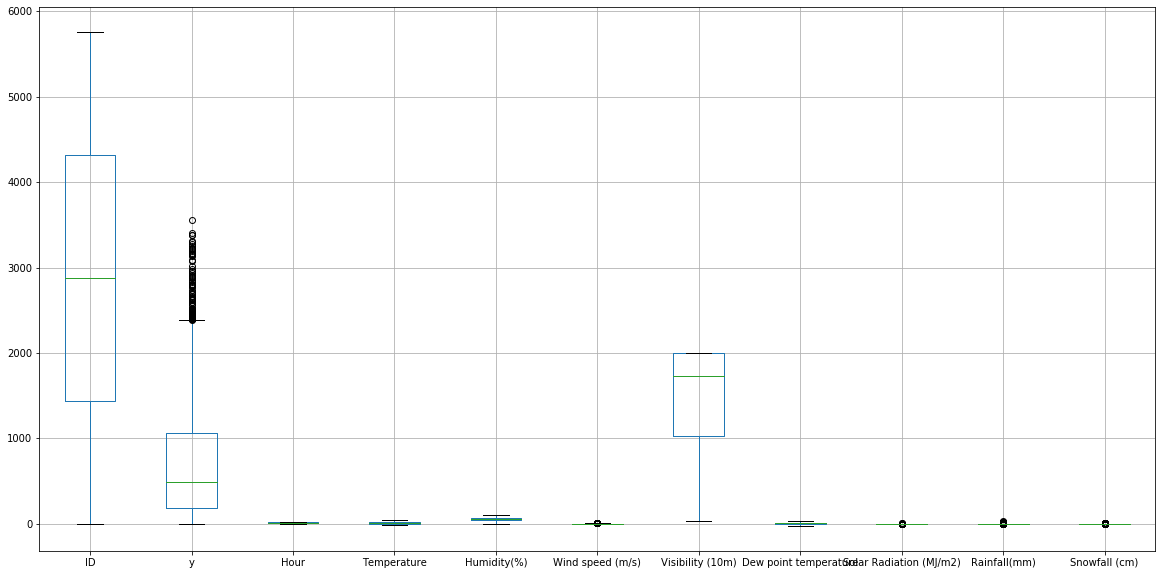

In [25]:
df_train.boxplot(figsize=(20,10))

In [26]:
#for column in df_train:
    #plt.figure()
    #sns.histplot(df_train[column])

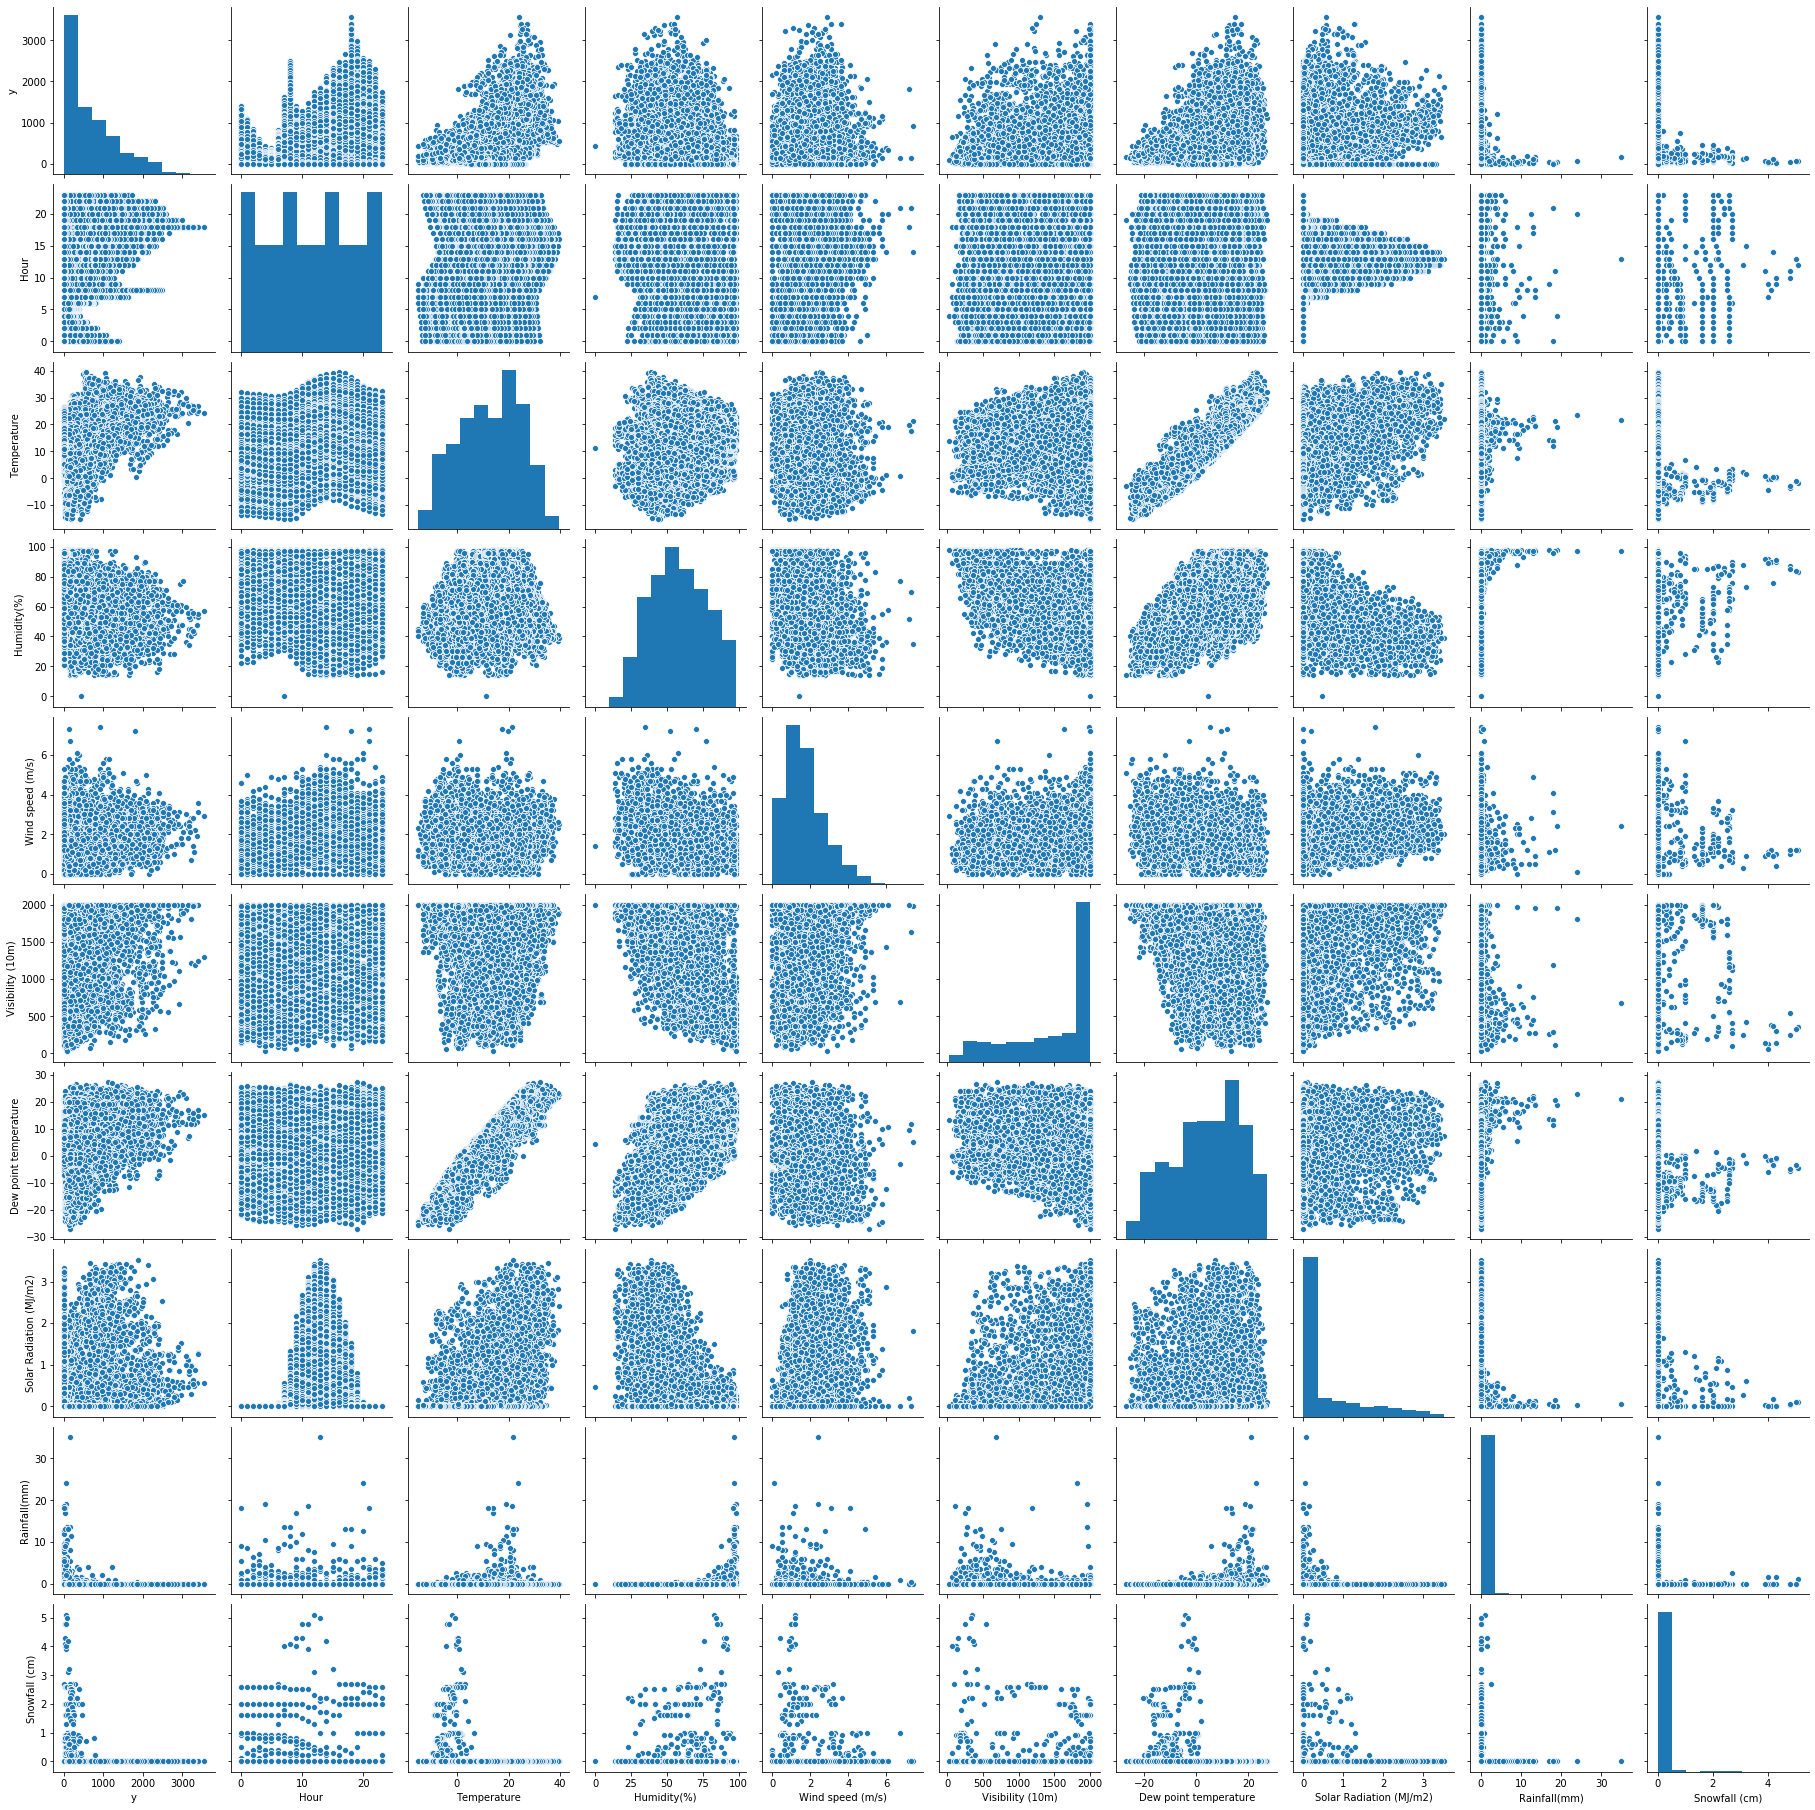

In [27]:
sns.pairplot(data=df_train.drop(['ID'],axis=1))

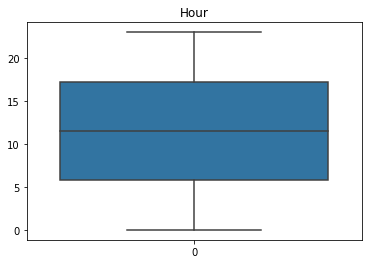

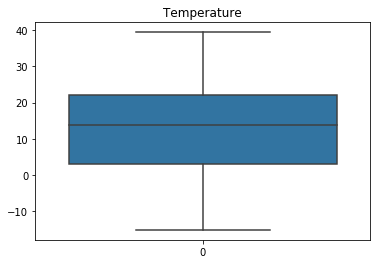

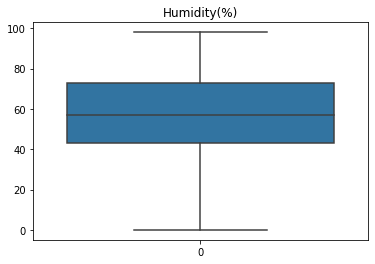

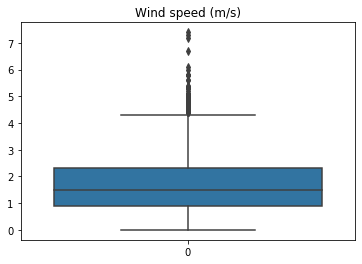

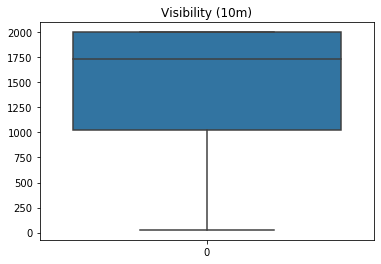

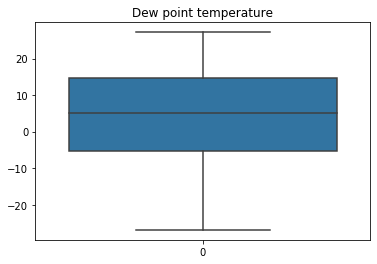

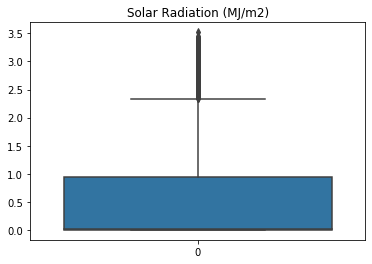

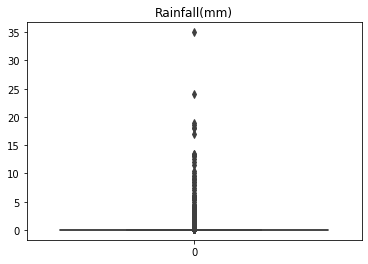

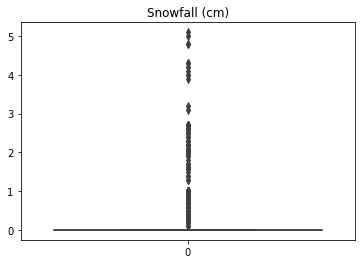

In [28]:
df = df_train.drop(['ID', 'Date', 'y','Seasons',
       'Holiday', 'Functioning Day'],axis=1)
        
for col in df:
    plt.figure()
    plt.title(col)
    sns.boxplot(data = df[col])

In [29]:
df_train.columns

Index(['ID', 'Date', 'y', 'Hour', 'Temperature', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [30]:
df_train[['Wind speed (m/s)','y']].max()

Wind speed (m/s)       7.4
y                   3556.0
dtype: float64

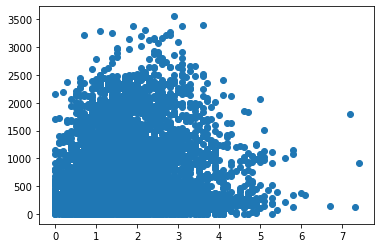

In [31]:
plt.scatter(df_train['Wind speed (m/s)'],df_train['y'])

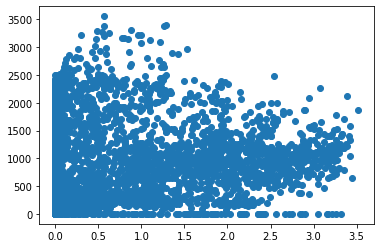

In [32]:
plt.scatter(df_train['Solar Radiation (MJ/m2)'],df_train['y'])

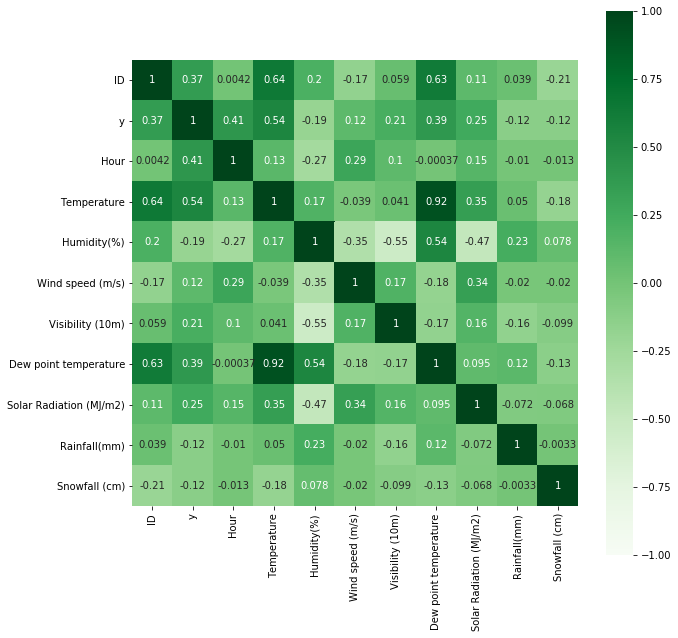

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='Greens',
            annot=True, 
            square=True);

In [34]:
df_train.head(10)

,ID,Date,y,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [35]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['year']= df_train['Date'].apply(lambda x:x.year)
df_train['month']= df_train['Date'].apply(lambda x:x.month)
df_train['day']=df_train['Date'].apply(lambda x:x.day)
#df_train
df_train['day_per_week'] = df_train['Date'].apply(lambda x:x.dayofweek)
df_train['week_per_year'] =df_train['Date'].apply(lambda x:x.weekofyear)
df_train = df_train.drop('Date' , axis=1)

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5760 non-null   int64  
 1   y                        5760 non-null   int64  
 2   Hour                     5760 non-null   int64  
 3   Temperature              5760 non-null   float64
 4   Humidity(%)              5760 non-null   int64  
 5   Wind speed (m/s)         5760 non-null   float64
 6   Visibility (10m)         5760 non-null   int64  
 7   Dew point temperature    5760 non-null   float64
 8   Solar Radiation (MJ/m2)  5760 non-null   float64
 9   Rainfall(mm)             5760 non-null   float64
 10  Snowfall (cm)            5760 non-null   float64
 11  Seasons                  5760 non-null   object 
 12  Holiday                  5760 non-null   object 
 13  Functioning Day          5760 non-null   object 
 14  year                    

In [37]:
df_train['Seasons'].value_counts()

Spring    1440
Autumn    1440
Summer    1440
Winter    1440
Name: Seasons, dtype: int64

In [38]:
dfy = pd.get_dummies(df_train.Seasons)
df_train = df_train.drop('Seasons',axis = 1)
df_train = df_train.join(dfy)
df_train.columns

Index(['ID', 'y', 'Hour', 'Temperature', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'year',
       'month', 'day', 'day_per_week', 'week_per_year', 'Autumn', 'Spring',
       'Summer', 'Winter'],
      dtype='object')

In [39]:
dft = pd.get_dummies(df_test.Seasons)
df_test = df_test.drop('Seasons',axis = 1)
df_test = df_test.join(dft)
df_test.columns

Index(['ID', 'Date', 'Hour', 'Temperature', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Autumn',
       'Spring', 'Summer', 'Winter'],
      dtype='object')

In [40]:
dfx = pd.get_dummies(df_train.Holiday)
df_train = df_train.drop('Holiday',axis = 1)
df_train = df_train.join(dfx)
df_train.columns

Index(['ID', 'y', 'Hour', 'Temperature', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Functioning Day', 'year', 'month',
       'day', 'day_per_week', 'week_per_year', 'Autumn', 'Spring', 'Summer',
       'Winter', 'Holiday', 'No Holiday'],
      dtype='object')

In [41]:
dfc = pd.get_dummies(df_test.Holiday)
df_test = df_test.drop('Holiday',axis = 1)
df_test = df_test.join(dfc)
df_test.columns

Index(['ID', 'Date', 'Hour', 'Temperature', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Functioning Day', 'Autumn', 'Spring',
       'Summer', 'Winter', 'Holiday', 'No Holiday'],
      dtype='object')

In [42]:
df_train.rename(columns={'No Holiday':'Working Day'}, inplace=True)

In [43]:
df_test.rename(columns={'No Holiday':'Working Day'}, inplace=True)

In [44]:
df_train.head(10)

,ID,y,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),...,month,day,day_per_week,week_per_year,Autumn,Spring,Summer,Winter,Holiday,Working Day
0,0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,...,1,12,3,2,0,0,0,1,0,1
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,...,1,12,3,2,0,0,0,1,0,1
2,2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,...,1,12,3,2,0,0,0,1,0,1
3,3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,...,1,12,3,2,0,0,0,1,0,1
4,4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,...,1,12,3,2,0,0,0,1,0,1
5,5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,...,1,12,3,2,0,0,0,1,0,1
6,6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,...,1,12,3,2,0,0,0,1,0,1
7,7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,...,1,12,3,2,0,0,0,1,0,1
8,8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,...,1,12,3,2,0,0,0,1,0,1
9,9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,...,1,12,3,2,0,0,0,1,0,1


In [45]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_train['Functioning Day'] = labelencoder.fit_transform(df_train['Functioning Day'])
df_train

,ID,y,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),...,month,day,day_per_week,week_per_year,Autumn,Spring,Summer,Winter,Holiday,Working Day
0,0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,1,12,3,2,0,0,0,1,0,1
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,1,12,3,2,0,0,0,1,0,1
2,2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,1,12,3,2,0,0,0,1,0,1
3,3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,1,12,3,2,0,0,0,1,0,1
4,4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,1,12,3,2,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,5755,1317,19,8.7,34,2.2,1857,-6.3,0.0,0.0,...,11,20,1,47,1,0,0,0,0,1
5756,5756,1078,20,8.5,32,2.6,1789,-7.2,0.0,0.0,...,11,20,1,47,1,0,0,0,0,1
5757,5757,1020,21,8.8,37,3.8,1750,-5.1,0.0,0.0,...,11,20,1,47,1,0,0,0,0,1
5758,5758,922,22,8.9,40,3.4,1810,-3.9,0.0,0.0,...,11,20,1,47,1,0,0,0,0,1


In [46]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_test['Functioning Day'] = labelencoder.fit_transform(df_test['Functioning Day'])
df_test

,ID,Date,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Autumn,Spring,Summer,Winter,Holiday,Working Day
0,5760,21/12/2017,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,1,0,0,0,1,0,1
1,5761,21/12/2017,1,-1.8,90,1.6,263,-3.2,0.0,0.0,2.2,1,0,0,0,1,0,1
2,5762,21/12/2017,2,-2.2,88,1.4,348,-3.9,0.0,0.0,2.2,1,0,0,0,1,0,1
3,5763,21/12/2017,3,-2.9,89,1.3,288,-4.4,0.0,0.0,2.2,1,0,0,0,1,0,1
4,5764,21/12/2017,4,-3.6,91,1.2,241,-4.8,0.0,0.0,2.2,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,1,0,0,0,0,1
2996,8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,1,0,0,0,0,1
2997,8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,1,0,0,0,0,1
2998,8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,1,0,0,0,0,1


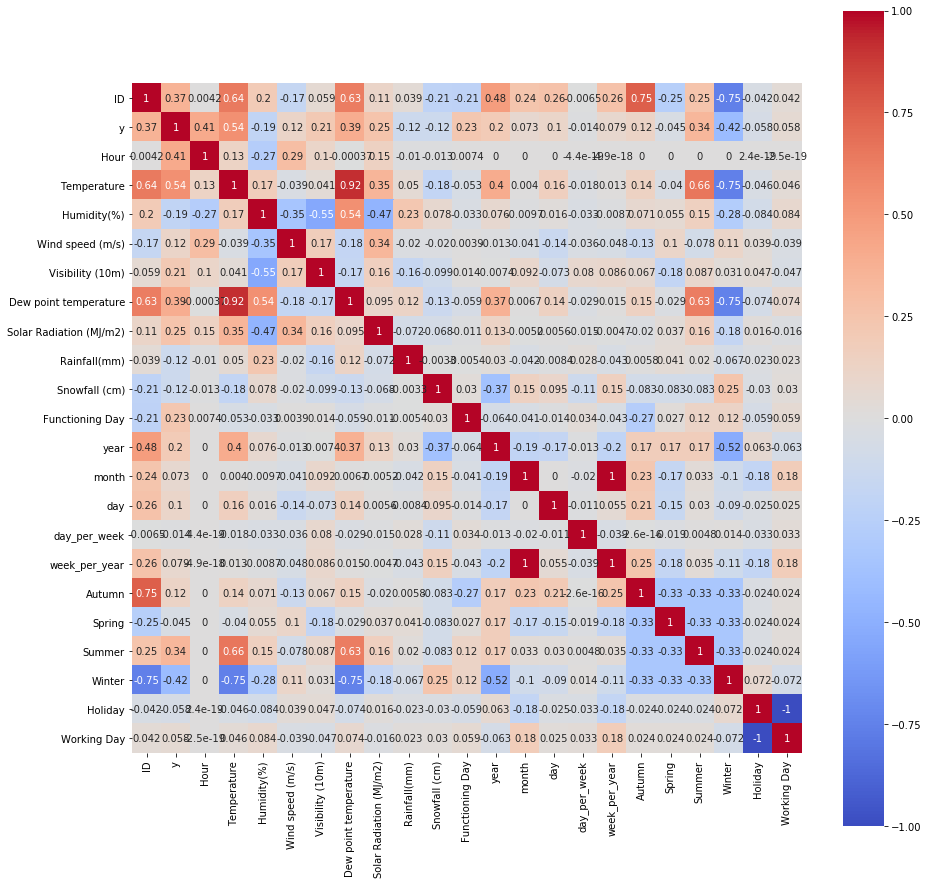

In [47]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True)

In [48]:
corr_mat = df_train.corr(method='pearson')
  
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values()
  
print(sorted_mat)

Holiday        Working Day     -1.000000
Working Day    Holiday         -1.000000
Winter         Temperature     -0.752995
Temperature    Winter          -0.752995
ID             Winter          -0.750000
                                  ...   
Autumn         Autumn           1.000000
Spring         Spring           1.000000
Summer         Summer           1.000000
Snowfall (cm)  Snowfall (cm)    1.000000
Working Day    Working Day      1.000000
Length: 529, dtype: float64


# Data Splitting

In [49]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df_train, test_size=0.2, shuffle=True,random_state=42) # Try adding `stratify` here

X_train = train_df.drop(columns=['ID','y','Dew point temperature'])

y_train = train_df['y']

X_val = val_df.drop(columns=['ID','y','Dew point temperature'])
y_val = val_df['y']

# Model Training

In [50]:
# acc 0.885273401124603 , drop dew_point temperature


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston 
# Create an instance of the classifier
regressor = RandomForestRegressor(n_jobs=-1) 
# Train the classifier
regressor = regressor.fit(X_train, y_train)

In [52]:
for col,score in zip(X_train.columns,regressor.feature_importances_): #feature importance
    print(col,score)

Hour 0.27484439070553374
Temperature 0.3247509290820317
Humidity(%) 0.10733595163395249
Wind speed (m/s) 0.013340420172333134
Visibility (10m) 0.012615649673300831
Solar Radiation (MJ/m2) 0.09189902852674312
Rainfall(mm) 0.009545496882937052
Snowfall (cm) 0.0002891018820577469
Functioning Day 0.09634174743367019
year 0.000400096707265316
month 0.006044836189286296
day 0.01358492253487657
day_per_week 0.013086994067000741
week_per_year 0.014548559595100187
Autumn 0.008872541977073803
Spring 0.004347541756239401
Summer 0.002267010032935272
Winter 0.0046271890800456805
Holiday 0.0005422915258668615
Working Day 0.0007153005417500453


In [53]:
y_pred = regressor.predict(X_val)
y_pred

array([1003.08, 1290.36,  190.07, ...,   89.43, 1245.97, 1777.41])

In [54]:
from sklearn.metrics import r2_score
#print("The accuracy of the classifier on the validation set is ", (regressor.r2_score(X_val, y_val)))
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_pred, y_val))

0.6867223243553674

In [55]:
X_val

,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,year,month,day,day_per_week,week_per_year,Autumn,Spring,Summer,Winter,Holiday,Working Day
4382,14,25.6,77,0.8,1930,0.78,0.0,0.0,1,2018,3,9,4,10,1,0,0,0,0,1
5060,20,10.2,46,0.2,2000,0.00,0.0,0.0,1,2018,11,10,5,45,1,0,0,0,0,1
2187,3,7.8,49,1.4,1972,0.00,0.0,0.0,1,2018,12,4,1,49,0,1,0,0,0,1
4813,13,17.6,49,4.7,2000,1.89,0.0,0.0,1,2018,1,10,2,2,1,0,0,0,0,1
5298,18,11.8,43,1.3,1995,0.03,0.0,0.0,1,2018,1,11,3,2,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070,22,20.5,78,0.9,550,0.00,0.0,0.0,1,2018,8,6,0,32,0,0,1,0,0,1
203,11,0.0,45,1.1,1500,0.89,0.0,0.0,1,2017,9,12,1,37,0,0,0,1,0,1
339,3,-6.9,56,0.5,1111,0.00,0.0,0.0,1,2017,12,15,4,50,0,0,0,1,0,1
4073,17,36.3,40,2.7,2000,1.93,0.0,0.0,1,2018,10,8,0,41,0,0,1,0,0,1


In [56]:
print(regressor.get_params)

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>


In [62]:
X_test = df_test.drop(columns=['Date','Dew point temperature'])

#y_test_predicted = regressor.predict(X_test)
#df_test['y'] = y_test_predicted
X_test
#df_test.head()

,ID,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Autumn,Spring,Summer,Winter,Holiday,Working Day
0,5760,0,-1.3,90,2.0,259,0.0,0.0,2.2,1,0,0,0,1,0,1
1,5761,1,-1.8,90,1.6,263,0.0,0.0,2.2,1,0,0,0,1,0,1
2,5762,2,-2.2,88,1.4,348,0.0,0.0,2.2,1,0,0,0,1,0,1
3,5763,3,-2.9,89,1.3,288,0.0,0.0,2.2,1,0,0,0,1,0,1
4,5764,4,-3.6,91,1.2,241,0.0,0.0,2.2,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,8755,19,4.2,34,2.6,1894,0.0,0.0,0.0,1,1,0,0,0,0,1
2996,8756,20,3.4,37,2.3,2000,0.0,0.0,0.0,1,1,0,0,0,0,1
2997,8757,21,2.6,39,0.3,1968,0.0,0.0,0.0,1,1,0,0,0,0,1
2998,8758,22,2.1,41,1.0,1859,0.0,0.0,0.0,1,1,0,0,0,0,1


In [ ]:
df_test[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import randint as sp_randint

In [ ]:
df_test